##  Load rbm

In [36]:
import sys
import os
import inspect
#sys.path.insert(0,'..')

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent =  os.path.dirname(currentdir) + '/RBM'
sys.path.insert(0,parent)

%load_ext autoreload
%autoreload 2
%matplotlib inline

from timeit import default_timer as timer
import numpy as np
import time
import matplotlib.pyplot as plt
import numexpr  as ne
import profile
import rbm
import pandas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Mnist

In [37]:
X = pandas.read_csv("../Datasets/MNIST/test_mnist.csv").values
X_ = pandas.read_csv("../Datasets/MNIST/train_mnist.csv")
X_= X_[X_.columns[1:]].values
X = np.concatenate((X, X_), axis=0) 
del(X_)

print('\t files read')
X = np.array(X>4, dtype ='float32')

saved_models_folder = "saved_models"
visible_dim = X.shape[1]
hidden_dim = 225
epochs = 100
K = 1
lr = 0.1
batch_size = 500


Xaux = np.array(X, dtype='float32')

	 files read


# RECALL when plotting with matplotlib

## matplotlib's plot pixel intensities are "relative" to the other values in the image

- The intensity of pixel values depends on the other values of the same plot.

- using the **vmin, vmax** arguments of imshow we can tune the black and white intensities of a plot

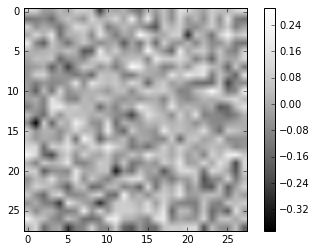

In [224]:
import matplotlib
import matplotlib.cm as cm

w = np.random.normal(loc=0, scale=0.1, size=(28,28))
matplotlib.pyplot.imshow(w, cmap = cm.Greys_r)
cbar = plt.colorbar()

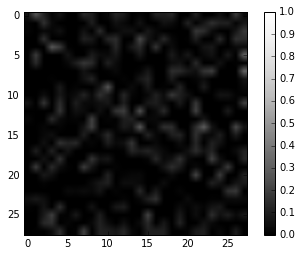

In [222]:
matplotlib.pyplot.imshow(w, cmap = cm.Greys_r, vmin = 0, vmax = 1)
cbar = plt.colorbar()


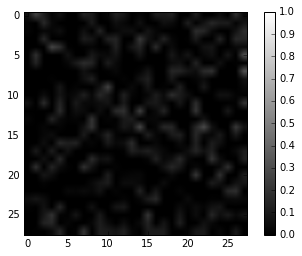

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import functools

bwimshow = functools.partial(plt.imshow, vmin = 0, vmax = 1,
                             cmap = plt.get_cmap('gray'))
bwimshow(w)
cbar = plt.colorbar()


## Define an RBM

In [135]:
rbm_ = rbm.RBM(visible_dim=visible_dim,
               hidden_dim=hidden_dim,
               seed=42,
               mu=0, 
               sigma=0.3,
               monitor_time=True)

## Example of changing some pixel values and plotting them

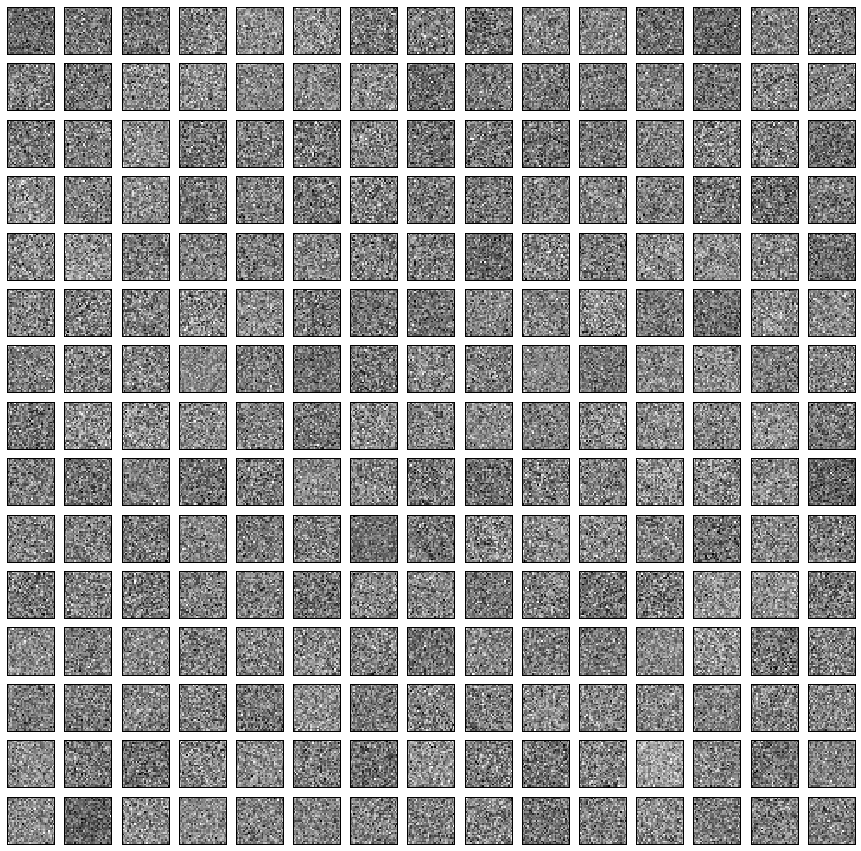

In [125]:
rbm_.plot_weights()

In [127]:
# put the half of the images in the first image as 0 value
rbm_.W.T[0][0:728/2] = 0

In [130]:
rbm_.W.T[0];

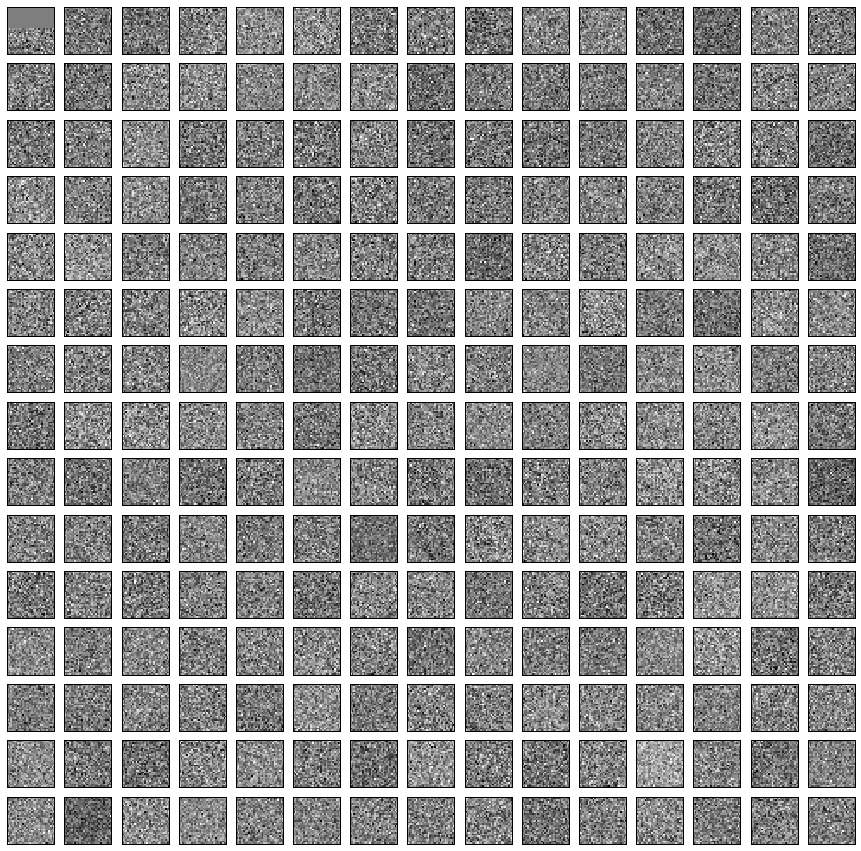

In [132]:
rbm_.plot_weights()

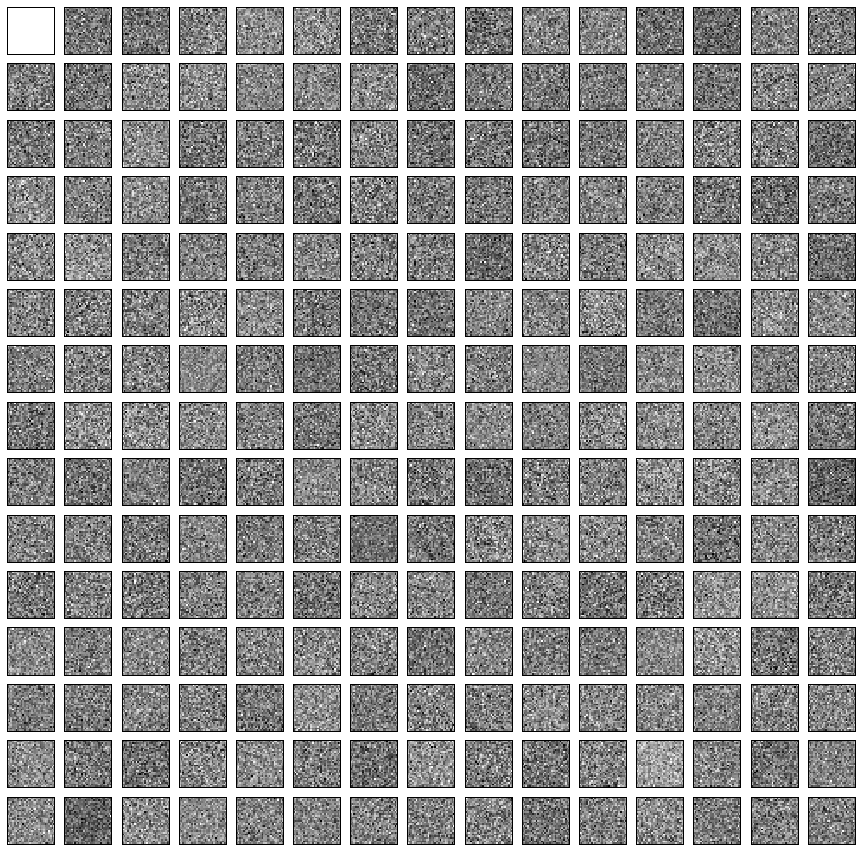

In [134]:
rbm_.W.T[0] = 0
rbm_.plot_weights()

## About plotting 